# kCCA Tutorial with UCI Digits Dataset

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../../..")

from multiview.embed.kcca import KCCA
from multiview.datasets.base import load_UCImultifeature

# In this example, kCCA is used to find relationships between 
# different views of a UCI dataset with handwritten digits. 
# All of the views have 2000 samples. We will only be using the first two
# views in this tutorial. View 1 has 76 dimensions and View 2 has 216 dimensions.

data = load_UCImultifeature()
views = data[0]
view_1 = views[0]
view_2 = views[1]
labels = data[1]

## Linear Kernel

In [2]:
# Create a linear kcca object as an instantiation of the KCCA object class
kcca_l = KCCA(ktype ="linear", reg = 0.0001, numCC = 2)

# Use the train() method to find a linear projection between the two views.
kcca_l.fit([view_1, view_2])

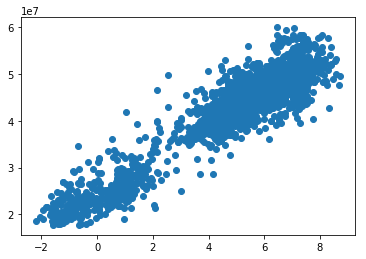

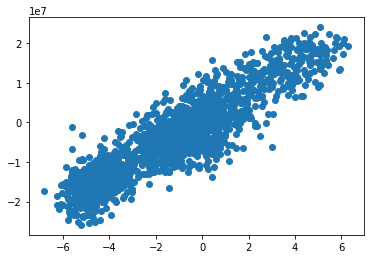

In [3]:
# Plot component 1 of view 1 and 2 into common subspace. Should be a linear correlation
fig = plt.figure()
plt.scatter(kcca_l.comps_[0][:,0],kcca_l.comps_[1][:,0])
fig = plt.figure()
plt.scatter(kcca_l.comps_[0][:,1],kcca_l.comps_[1][:,1])

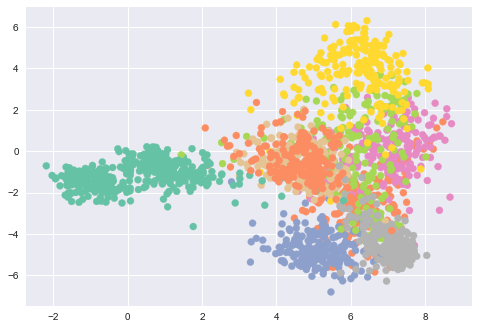

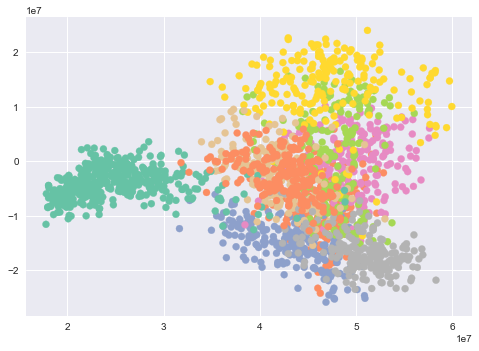

In [7]:
plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in labels]

# Plot component 1 and 2 of view 1 and component 1 and 2 of view 2. Should be a similar shape.
fig = plt.figure()
plt.scatter(kcca_l.comps_[0][:,0],kcca_l.comps_[0][:,1], label = labels, color=color_map)
fig = plt.figure()
plt.scatter(kcca_l.comps_[1][:,0],kcca_l.comps_[1][:,1], label = labels, color=color_map)

In [8]:
# Call cancorrs_ to find the correlation between the two canonical components
kcca_l.cancorrs_

array([0.93643618, 0.901117  , 0.77483542, 0.72769324])

# Polynomial kCCA

In [9]:
# Create a polynomial kcca object as an instantiation of the KCCA object class
kcca_p2 = KCCA(ktype ="poly", reg = 0.0001, numCC = 2, degree = 2)

# Use the train() method to find a polynomial projection between the two views.
kcca_p2.fit([view_1, view_2])

In [ ]:
kcca_p3 = KCCA(ktype ="poly", reg = 0.0001, numCC = 2, degree = 3)
kcca_p3.fit([view_1, view_2])

In [ ]:
kcca_p4 = KCCA(ktype ="poly", reg = 0.0001, numCC = 2, degree = 4)
kcca_p4.fit([view_1, view_2])

In [ ]:
kcca_p5 = KCCA(ktype ="poly", reg = 0.0001, numCC = 2, degree = 5)
kcca_p5.fit([view_1, view_2])

In [ ]:
# Plot component 1 and 2 of view 1 and component 1 and 2 of view 2. Should be a similar shape.
fig = plt.figure()
plt.scatter(kcca_p2.comps_[0][:,0],kcca_p2.comps_[0][:,1], label = labels, color=color_map)
fig = plt.figure()
plt.scatter(kcca_p2.comps_[1][:,0],kcca_p2.comps_[1][:,1], label = labels, color=color_map)

In [ ]:
fig = plt.figure()
plt.scatter(kcca_p3.comps_[0][:,0],kcca_p3.comps_[0][:,1], label = labels, color=color_map)
fig = plt.figure()
plt.scatter(kcca_p3.comps_[1][:,0],kcca_p3.comps_[1][:,1], label = labels, color=color_map)

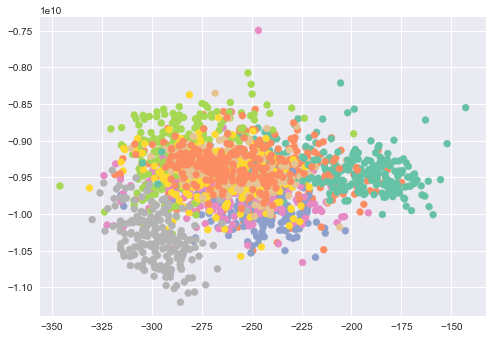

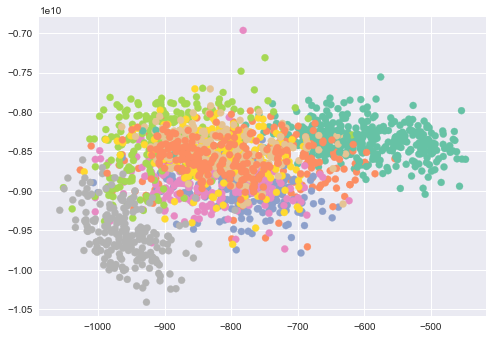

In [10]:
fig = plt.figure()
plt.scatter(kcca_p4.comps_[0][:,0],kcca_p4.comps_[1][:,0], label = labels, color=color_map)
fig = plt.figure()
plt.scatter(kcca_p4.comps_[0][:,1],kcca_p4.comps_[1][:,1], label = labels, color=color_map)

In [ ]:
fig = plt.figure()
plt.scatter(kcca_p5.comps_[0][:,0],kcca_p5.comps_[1][:,0], label = labels, color=color_map)
fig = plt.figure()
plt.scatter(kcca_p5.comps_[0][:,1],kcca_p5.comps_[1][:,1], label = labels, color=color_map)

In [18]:
# Call cancorrs_ to find the correlation between the two canonical components
kcca_p.cancorrs_

array([0.13654408, 0.35362344])

## Gaussian Kernel

In [19]:
# Create a gaussian kcca object as an instantiation of the KCCA object class
kcca_g = KCCA(ktype ="gaussian", reg = 0.0001, numCC = 2, gausigma = 0.25)

# Use the train() method to find a gaussian projection between the two views.
kcca_g.fit([view_1, view_2])

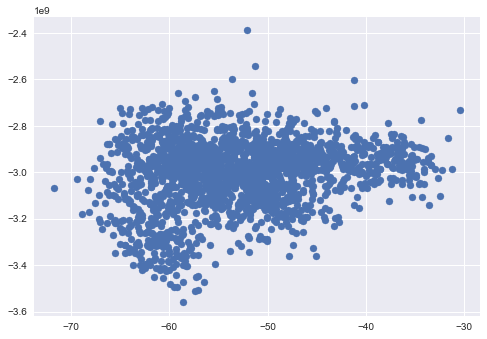

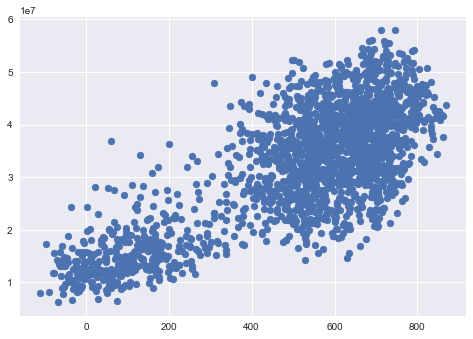

In [20]:
# Use the comps_ variable, which holds the canonical components to project both views into a common space
fig = plt.figure()
plt.scatter(kcca_g.comps_[0][:,0],kcca_g.comps_[1][:,0])
fig = plt.figure()
plt.scatter(kcca_g.comps_[0][:,1],kcca_g.comps_[1][:,1])

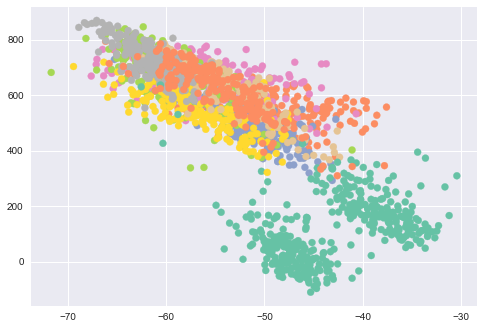

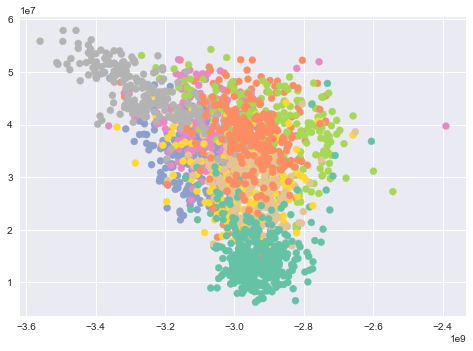

In [21]:
fig = plt.figure()
plt.scatter(kcca_g.comps_[0][:,0],kcca_g.comps_[0][:,1], label = labels, color=color_map)
fig = plt.figure()
plt.scatter(kcca_g.comps_[1][:,0],kcca_g.comps_[1][:,1], label = labels, color=color_map)

In [10]:
# Call cancorrs_ to find the correlation between the two canonical components
kcca_g.cancorrs_

array([0.19872405, 0.75162478])

In [11]:
# If you are splitting test data into training and testing datasets, you can use 
# train() on the training dataset and then using validate() on the testing dataset.
# validate() will use the canonical weights on the testing data to bring the test data
# into the projected shared space.